In [8]:
import sys 
sys.path.append("/Users/maithoma/work/github/bsr/analysis/")
%matplotlib inline

try:
    reload(bsrAnalysisLib)
except:
    import bsrAnalysisLib
    
    
from bsrAnalysisLib import *

In [10]:
token = subjects[-1]
J,Jlist = retrieveExperiment(token)
print Jlist

{0: u'00_blink5times', 1: u'01_restingStateOpenEyes', 2: u'02_restingStateClosedEyes', 3: u'03_doMath', 4: u'04_readTextEnglish', 5: u'05_RSVP_cst', 6: u'06_RSVP_bsrPlus', 7: u'07_RSVP_bsrMinus', 8: u'config'}


In [137]:
def pullResponses(dic,treatment):
    r = dic[treatment]['responses']
    return r

In [140]:
treatment = Jlist[5]
pullResponses(J,treatment)

{u'r1': {u'response': u'Its about sending a space mission to mars.',
  u't0': 1432235057.714155,
  u't1': 1432235072.337957},
 u'r2': {u'response': [u'MIT', u' NASA', u' Obama'],
  u't0': 1432235073.353741,
  u't1': 1432235085.600679},
 u'r3': {u'response': {u'choices': [u'1', u'2', u'3'],
   u'input': [u'cost',
    u'team',
    u'human',
    u'analysis',
    u'handful',
    u'everybody']},
  u't0': 1432235086.617439,
  u't1': 1432235102.449026},
 u'r4': {u'response': u'8',
  u't0': 1432235112.227547,
  u't1': 1432235119.120593}}

05_RSVP_cst
647 647
647 647


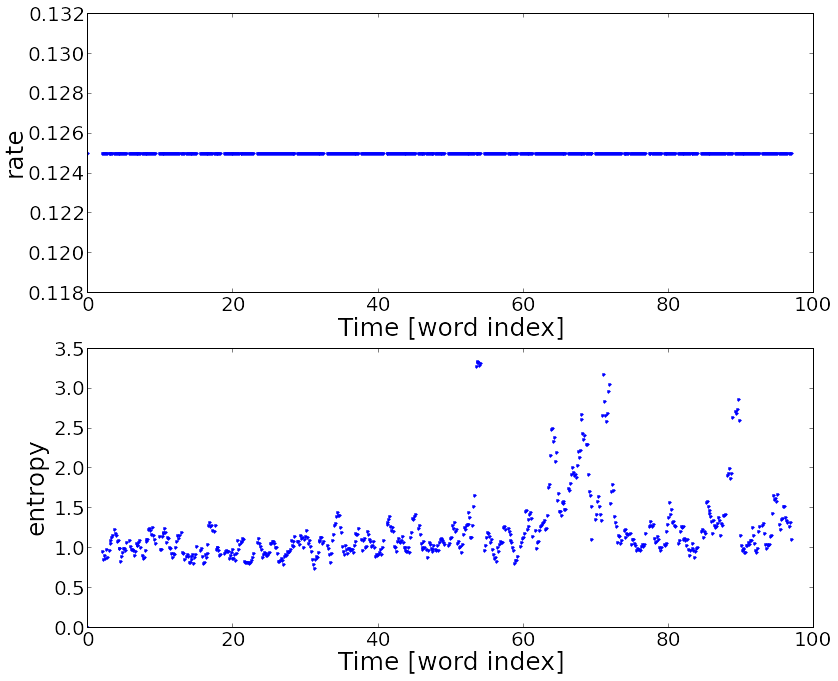

In [18]:
index =  5
print Jlist[index]#,J[Jlist[index]]['meta']['articleKey']
pl.figure(1,(13,17))
pl.subplot(311)
plotTimeSeries(J,Jlist[index],valueType="rate")
try:
    pl.subplot(312)

    plotTimeSeries(J,Jlist[index],valueType="entropy")
    pl.subplot(313)
    plotTimeSeries(J,Jlist[index],valueType="normalized_entropy") 
except:
    pass

In [9]:
pl.figure(1,(10,10))
for i in range(5):
    eeg = J[Jlist[i]]['eegData']
    output = entropySeries(eeg['t'],eeg['rawsig'],1,windowSize=1,normalize=True)

    xOutput = np.linspace(1,128,100)
    a,s = avgPowerSpectrum(np.array(output['spectra']),xOutput)
    p = 1
    pDown = np.percentile(a,p,axis=0)
    pUp = np.percentile(a,100-p,axis=0)

    avg = np.mean(a,0)
    std = np.std(a,0)

    lx = np.log10(xOutput)
    ly = np.log10(avg)
    pl.errorbar(lx,ly,yerr=(pUp,pDown),label=Jlist[i])
pl.legend(loc=0)
pl.xlabel("log10(Frequency) [Hz]")
pl.ylabel("log10(Probability Density Function)")

NameError: name 'J' is not defined